In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [8]:
beta = 1
cbm_energy = -0.5
spid_energy = -0.05

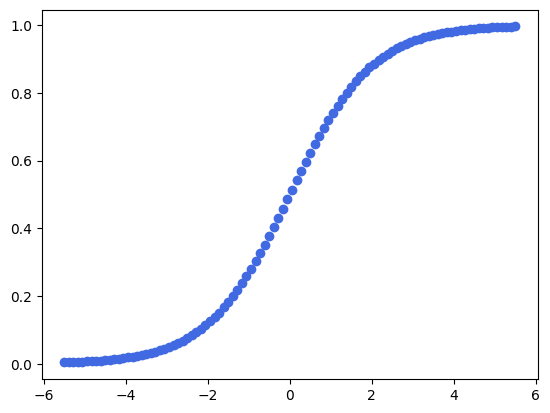

In [16]:
for cbm_count,spid_count in zip(np.linspace(-10,10,100),np.linspace(-10,10,100)):

    E = cbm_count*cbm_energy + spid_count*spid_energy
    P = 1/(1+np.exp(-E))
    plt.scatter(E,P,color='royalblue')

plt.show()

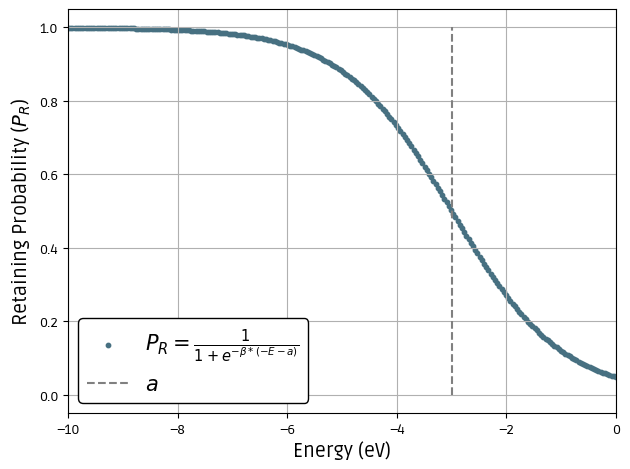

In [104]:
ps,es = [],[]
a = -3

for E in np.linspace(-10,0,250):

    P = 1/(1 + np.exp(-1*(-E + a)))
    
    ps.append(P)
    es.append(E)
    
plt.scatter(es,ps,color='#477081',s=10,label=r'$ P_{R} = \frac{1}{1 + e^{-\beta*(-E - a)}}$')
plt.vlines(x=a,ymin=0,ymax=1,color='gray',linestyle='--',label='$a$')

plt.xlim(min(es),max(es))
# plt.ylim(min(ps),max(ps))

plt.xlabel('Energy (eV)',fontsize=14),plt.ylabel('Retaining Probability ($P_R$)',fontsize=14)
plt.legend(fontsize=15,edgecolor='black',framealpha=1,loc='lower left')
plt.grid(),plt.tight_layout()
plt.savefig('results/sig.png',transparent=True,dpi=500)
plt.show()